In [1]:
# 1. Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
# 2. Generate synthetic dataset
X, y = make_classification(
    n_samples=500, n_features=2, n_informative=2, n_redundant=0,
    n_clusters_per_class=1, flip_y=0.1, class_sep=1.5, random_state=42
)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# 3. Train weak learner (decision stump = tree with max_depth=1)
stump = DecisionTreeClassifier(max_depth=1, random_state=42)
stump.fit(X_train, y_train)
y_pred_stump = stump.predict(X_test)

In [5]:
# 4. Train AdaBoost classifier
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1), # weak learner
    n_estimators=100,  # number of weak learners
    learning_rate=0.5,
    random_state=42
)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

# 5. Evaluate
print("Decision Stump Accuracy:", accuracy_score(y_test, y_pred_stump))
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))

Decision Stump Accuracy: 0.9066666666666666
AdaBoost Accuracy: 0.9


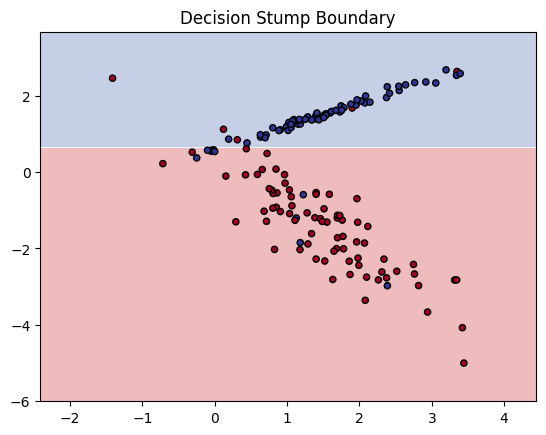

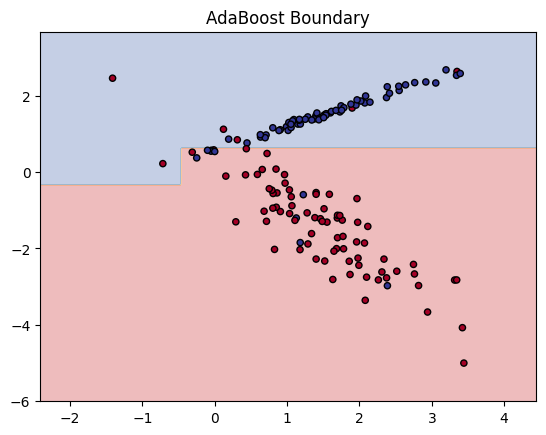

In [6]:
# 6. Plot decision boundaries
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k", cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.show()

# Plot for stump vs AdaBoost
plot_decision_boundary(stump, X_test, y_test, "Decision Stump Boundary")
plot_decision_boundary(ada, X_test, y_test, "AdaBoost Boundary")